In [1]:
#import the libraries needed for this module:
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import re
from nltk.stem.porter import PorterStemmer

In [2]:
#to make it easier to plot according to classification, define a function for plotting:
def plot_scatter(x1, x2, y):
    plt.scatter(x1, x2, c=y.flatten())
    plt.xlabel("x1")
    plt.ylabel("X2")

In [3]:
#to plot decision boundary for svm classifier:
def plot_boundary(model, X, title):
    x_max, x_min = np.max(X[..., 0]), np.min(X[..., 0])
    y_max, y_min = np.max(X[..., 1]), np.min(X[..., 1])
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
    p = model.predict(np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1))
    plt.contour(xx, yy, p.reshape(xx.shape))
    plt.title(title)

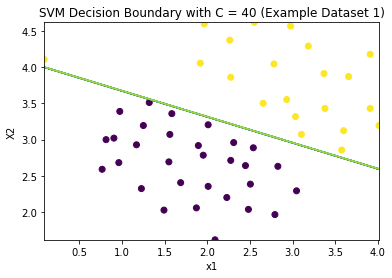

In [4]:
#Load the data and tune the value of C to see it's outcome:
C=40
data1 = sio.loadmat("ex6/ex6data1.mat")
X = data1["X"]
y = data1["y"]
plot_scatter(X[..., 0], X[..., 1], y)
model = svm.SVC(C=C, kernel='linear')
model.fit(X, y.ravel())
plot_boundary(model, X, "SVM Decision Boundary with C = " + str(C) + " (Example Dataset 1)")
plt.show()

In [5]:
#define a Gaussian function:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-np.sum(np.power(x1 - x2, 2)) / (2 * sigma ** 2))

In [6]:
#test the Gaaussian function:
print(gaussian_kernel(np.array([1, 2, 1]), np.array([0, 4, -1]), 2.))

0.32465246735834974


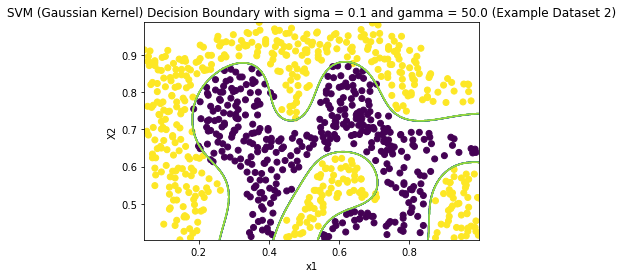

In [7]:
#plot the boundary for dataset 2 with a given sigma
data2 = sio.loadmat("ex6/ex6data2.mat")
X = data2['X']
y = data2['y']
sigma = 0.1
gamma = 1 / (2 * np.power(sigma, 2))
plot_scatter(X[..., 0], X[..., 1], y)
model = svm.SVC(C=1, kernel='rbf', gamma=gamma)
model.fit(X, y.ravel())
plot_boundary(model, X, "SVM (Gaussian Kernel) Decision Boundary with sigma = " + str(sigma) + " and gamma = " + str(np.round(gamma)) + " (Example Dataset 2)")
plt.show()

the best choice of parameters:C= 1.0 ,sigma= 0.1 ,score= 0.965


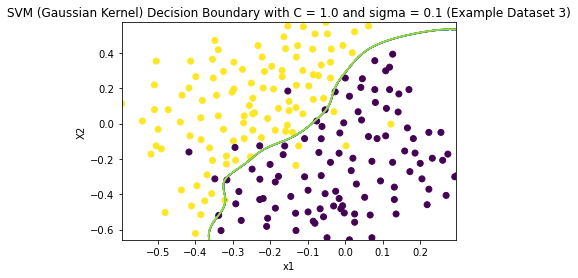

In [8]:
#find the optimal combo of C and sigma for dataset 3 and plot the decision boundary with the optimals
data3 = sio.loadmat("ex6/ex6data3.mat")
X = data3['X']
y = data3['y']
Xval = data3['Xval']
yval = data3['yval']
xx, yy = np.meshgrid(np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]), np.array([0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]))
parameters = np.concatenate((xx.ravel().reshape(-1, 1), yy.ravel().reshape(-1, 1)), axis=1)
score = np.zeros(1)
for C, sigma in parameters:
    gamma = 1 / (2 * np.power(sigma, 2))
    model = svm.SVC(C=C, kernel='rbf', gamma=gamma)
    model.fit(X, y.ravel())
    score = np.append(score, model.score(Xval, yval.ravel()))
res = np.concatenate((parameters, score[1:].reshape(-1, 1)), axis=1)
index = np.argmax(res, axis=0)[-1]
print("the best choice of parameters:C=", res[index][0], ",sigma=", res[index][1], ",score=", res[index][2])
C = res[index][0]
sigma = res[index][1]
gamma = 1 / (2 * np.power(sigma, 2))
plot_scatter(X[..., 0], X[..., 1], y)
model = svm.SVC(C=C, kernel='rbf', gamma=gamma)
model.fit(X, y.ravel())
plot_boundary(model, X, "SVM (Gaussian Kernel) Decision Boundary with C = " + str(C) + " and sigma = " + str(sigma) + " (Example Dataset 3)")
plt.show()

In [9]:
def process_email(content):
    content = content.lower()
    content = re.sub(r'<.*>', '', content)  # remove html
    content = re.sub(r'http[s]?://.+', 'httpaddr', content)  # remove url
    content = re.sub(r'[\S]+@[\w]+.[\w]+', 'emailaddr', content)  # remove email address
    content = re.sub(r'[\$][0-9]+', 'dollar number', content)  # remove $, connection between dollar and number
    content = re.sub(r'\$', 'dollar number', content)  # remove single $
    content = re.sub(r'[0-9]+', 'number', content)  # remove numbers 
    content = re.sub(r'[\W]+', ' ', content)  # reomove characters
    words = content.split(' ')
    if words[0] == '':
        words = words[1:]  
    porter_stemmer = PorterStemmer()
    for i in range(len(words)):
        words[i] = porter_stemmer.stem(words[i])
    return words

In [10]:
def mapping(word, vocab):
    for i in range(len(vocab)):
        if word == vocab[i]:
            return i
    return None

In [11]:
def email_features(email, vocab):
    features = np.zeros((len(vocab, )))
    for word in email:
        index = mapping(word, vocab)
        if index is not None:
            features[index] = 1
    return features

In [12]:
if __name__ == "__main__":
    f = open("ex6/vocab.txt")
    vocab = []  # Python index starts from 0, which is different to the Matlab implementation
    for l in f.readlines():
        s = l.split('\t')[-1].split('\n')[0]
        vocab.append(s)
    print(mapping('anyon', vocab))
    print(email_features("aa hello", vocab))

    train_data = sio.loadmat("ex6/spamTrain.mat")
    train_X = train_data['X']  # (4000,1899)
    train_y = train_data['y']  # (4000,1)
    test_data = sio.loadmat("ex6/spamTest.mat")
    test_X = test_data['Xtest']  # (1000,1899)
    test_y = test_data['ytest']  # (1000,1)
    model = svm.SVC(kernel='linear')  # n is pretty large so linear kernel is better to be used.
    model.fit(train_X, train_y.ravel())
    print(model.score(train_X, train_y.ravel()), model.score(test_X, test_y.ravel()))

    x = email_features(process_email(open("ex6/emailSample2.txt").read()), vocab)
    print(model.predict(x.reshape(1, -1)))

85
[0. 0. 0. ... 0. 0. 0.]
0.99975 0.978
[0]
